In [51]:
import numpy as np
import pickle
# runs = ["one", "two", "three", "four", "five"]
ks = [0, 3000, 6000, 9000, 12000]
runs = ["one"]
betas = [0.1, 0.3, 0.5, 10.0]
test_losses = np.zeros((len(ks), len(betas), len(runs), 15))
for e, k in enumerate(ks):
    for j, beta in enumerate(betas):
        for i, run in enumerate(runs):
            path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\new_imputation\\run_{run}\\fedimputed_cvae_{k}_{beta}_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl"
            print(path)
            with open(path, 'rb') as f:
                results_run_one = pickle.load(f)

            test_losses[e][j][i] = np.mean(results_run_one[1], axis=0)
print(np.nanmean(test_losses, axis=(1,2)))

C:\Users\LohithSai\Desktop\FederatedImputation\TheArchive\new_imputation\run_one\fedimputed_cvae_0_0.1_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl
C:\Users\LohithSai\Desktop\FederatedImputation\TheArchive\new_imputation\run_one\fedimputed_cvae_0_0.3_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl
C:\Users\LohithSai\Desktop\FederatedImputation\TheArchive\new_imputation\run_one\fedimputed_cvae_0_0.5_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl
C:\Users\LohithSai\Desktop\FederatedImputation\TheArchive\new_imputation\run_one\fedimputed_cvae_0_10.0_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl
C:\Users\LohithSai\Desktop\FederatedImputation\TheArchive\new_imputation\run_one\fedimputed_cvae_3000_0.1_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl
C:\Users\LohithSai\Desktop\FederatedImputation\TheArchive\new_imputation\run_one\fedimputed_cvae_3000_0.3_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl
C:\Users\LohithSai\Desktop\FederatedImp

[[8.87928391e+01 1.44382284e+01 1.14096036e+01 5.65052063e+00
  4.52515559e+00 5.50109729e+00 3.49986235e+00 3.09663547e+00
  3.03025165e+00 3.48400331e+00 2.53313381e+00 2.45031904e+00
  2.36502162e+01 2.93246384e+00 2.35575398e+00]
 [2.32918217e+01 1.52297393e+01 3.12961700e+01 1.10536985e+01
  9.98265093e+00 5.95570094e+00 5.33829540e+00 4.42942921e+00
  3.64765918e+00 3.91761326e+00 2.59167603e+01 3.02865072e+00
  1.65154181e+01 2.31488029e+00 2.84268332e+00]
 [2.94376634e+03 9.69130929e+02 7.47181400e+02 2.20087898e+03
  3.04622342e+03 2.21431357e+03 1.36403195e+03 7.43929927e+02
  1.24536627e+03 1.49031336e+02 3.66299755e+02 1.48198164e+02
  1.14503352e+03 2.08536186e+03 1.89989346e+03]
 [2.87926603e+01 4.67064069e+02 9.20896324e+02 9.06741424e+01
  3.55537081e+03 7.63486486e+02 6.88454066e+03 5.51477307e+02
  8.06187859e+02 5.68714258e+03 3.20218999e+03 1.84169701e+03
  9.37806961e+02 6.28024318e+01 5.26699705e+02]
 [4.72046421e+02 2.82610922e+04 1.74491645e+03 3.16924744e+02
  

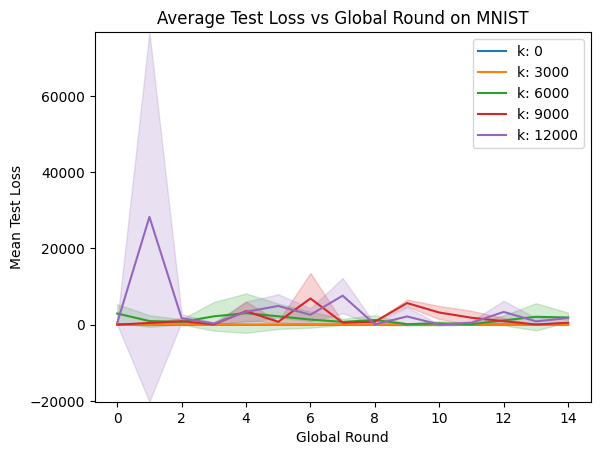

In [53]:
from matplotlib import pyplot as plt
# print(np.min(test_losses))
mean_test_losses = np.nanmean(test_losses, axis=(1,2))
std_test_losses = np.nanstd(test_losses, axis=(1,2))

print(mean_test_losses)
for e, k in enumerate(ks):
    # for i, beta in enumerate(betas):
    line, = plt.plot(mean_test_losses[e], label=f'k: {k}')
    color = line.get_color()
    # Plot the shaded area for the standard deviation
    plt.fill_between(
        np.arange(15),
        mean_test_losses[e] - std_test_losses[e],
        mean_test_losses[e] + std_test_losses[e],
        color=color, alpha=0.2
    )

plt.title("Average Test Loss vs Global Round on MNIST")
plt.xlabel('Global Round')
plt.ylabel('Mean Test Loss')
y_min = np.min(mean_test_losses - std_test_losses)
y_max = np.max(mean_test_losses + std_test_losses)
plt.ylim(y_min, y_max)  # Set the y-axis limits
plt.legend()
plt.show()

In [55]:
import numpy as np
import pickle
runs = ["one"]
# ks = [0, 100, 500, 1000]
# betas = [0.1, 0.3, 0.5, 10.0, 100.0]
test_losses = np.zeros((len(ks), len(runs), 15))
f1_scores = np.zeros((len(betas), len(ks), len(runs)))
for j, beta in enumerate(betas):
    for e, k in enumerate(ks):
        for i, run in enumerate(runs):
            # path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\imputation_experiments\\run_{run}\\fedimputed_cvae_{k}_{beta}_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10].pkl"
            path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\new_imputation\\run_{run}\\fedimputed_cvae_{k}_{beta}_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10]_minority_True.pkl"
            with open(path, 'rb') as f:
                results_run_one = pickle.load(f)

            test_losses[e][i] = np.mean(results_run_one[2], axis=0)
            f1_scores[j][e][i] = results_run_one[4]
# print(np.mean(f1_scores, axis=(1, 2)))


# I want to see for k=100, beta=0.1 and k= 1000, beta = 0.1
for b in range(len(betas)):
    print(f"beta: {betas[b]}: ")
    for i in range(len(ks)):
        print(f"k ({ks[i]}): {np.nanmean(f1_scores[b][i])}")


beta: 0.1: 
k (0): 0.8425
k (3000): 0.8156
k (6000): 0.101
k (9000): 0.098
k (12000): 0.1135
beta: 0.3: 
k (0): 0.9641
k (3000): 0.9584
k (6000): 0.0958
k (9000): 0.098
k (12000): 0.098
beta: 0.5: 
k (0): 0.9632
k (3000): 0.9645
k (6000): 0.1032
k (9000): 0.1009
k (12000): 0.0974
beta: 10.0: 
k (0): 0.95
k (3000): 0.961
k (6000): 0.9599
k (9000): 0.1028
k (12000): 0.101


In [56]:
print(f1_scores[1][3])
f1_scores[1][3][1] = f1_scores[f1_scores != f1_scores[1][3][1]].mean()
print(f1_scores)

[0.098]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [57]:
print(f1_scores[1][3])

[0.098]


[0.92995  0.924875 0.314975 0.099925 0.102475]


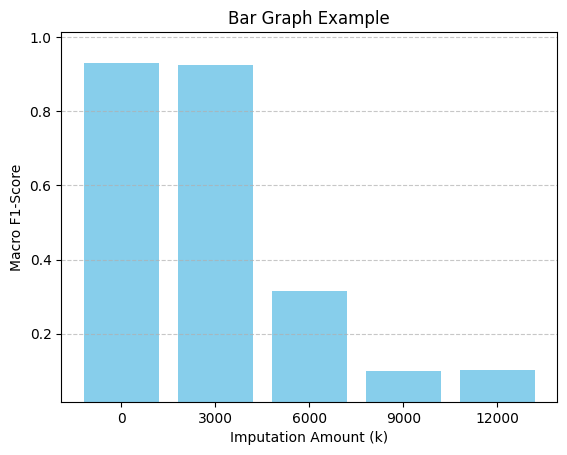

In [58]:
avg_f1_scores = np.mean(f1_scores, axis=(0,2))
print(avg_f1_scores)
plt.bar([str(f) for f in ks], avg_f1_scores   , color='skyblue')

# Add title and labels
plt.title('Bar Graph Example')
plt.xlabel('Imputation Amount (k)')
plt.ylabel('Macro F1-Score')

# Optionally add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
y_min = min(avg_f1_scores) - 0.1 * (max(avg_f1_scores) - min(avg_f1_scores))
y_max = max(avg_f1_scores) + 0.1 * (max(avg_f1_scores) - min(avg_f1_scores))
plt.ylim(y_min, y_max)
# Show the plot
plt.show()

(4, 5, 1)
(4, 5)


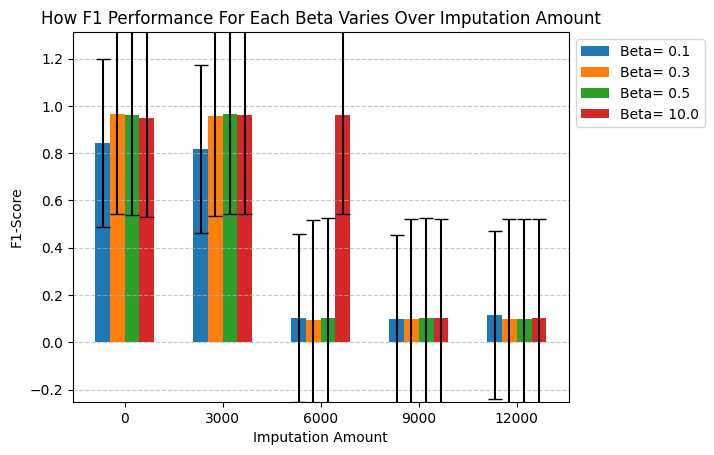

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
print(f1_scores.shape)
data = np.mean(f1_scores, axis=2)
categories = [str(f) for f in ks]
num_bars_per_category = data.shape[0]
print(data.shape)
std_dev = np.std(data, axis=1)

# Setting the positions and width for the bars
bar_width = 0.15
x = np.arange(len(categories))  # the label locations

# Plotting
fig, ax = plt.subplots()

# Loop to plot each set of bars
for i in range(num_bars_per_category):
    ax.bar(x + i * bar_width, data[i], bar_width, yerr=std_dev[i], label=f'Beta= {betas[i]}', capsize=5)

# Adding labels and title
ax.set_xlabel('Imputation Amount')
ax.set_ylabel('F1-Score')
ax.set_title('How F1 Performance For Each Beta Varies Over Imputation Amount')
ax.set_xticks(x + bar_width * (num_bars_per_category - 1) / 2)
ax.set_xticklabels(categories)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rescale the y-axis to better show differences
# y_min = np.min(data - std_dev) - 0.1 * (np.max(data + std_dev) - np.min(data - std_dev))
# y_max = np.max(data + std_dev) + 0.1 * (np.max(data + std_dev) - np.min(data - std_dev))
# ax.set_ylim(y_min, y_max)
y_min = np.min(data) - 0.4 * (np.max(data) - np.min(data))
y_max = np.max(data) + 0.4 * (np.max(data) - np.min(data))
ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()

In [128]:
import pickle
path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\save\\objects\\fedimputed_cvae_0_0.1_mnist_exq_3_C[1.0]_iid[2]_E[1]_B[10].pkl"
with open(path, 'rb') as f:
    results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\save\\objects\\fedimputed_cvae_0_0.1_mnist_exq_3_C[1.0]_iid[2]_E[1]_B[10].pkl'

In [129]:
results[2]

array([[0.952     , 0.9605    , 0.96916667]])